In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ase.build import bulk
from ase.io import read, write
from atomrdf.structure import System
from atomrdf import KnowledgeGraph
from pyscal3 import System as PSystem

In [2]:
n = 50
print(n**3*4)
s_ase = bulk('Cu').repeat((n,n,n))
write('struct.data', s_ase, format='lammps-data', atom_style='atomic')
#sys = System.create.element.Cu(repetitions=(n,n,n))
#sys.write.file('struct.data')

500000


In [3]:
kg = KnowledgeGraph()

In [ ]:
#%%timeit
sys = System.read.file('struct.data', format='lammps-data', graph=kg)
_ = sys.analyze.common_neighbor_analysis()

: 

In [21]:
%%timeit
sys = read('struct.data', format='lammps-dump-text', style='atomic')

4.47 s ± 135 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Tests for Cu structure with n repetitions in lammps-data format

In [6]:
n = np.array([2, 4, 7, 10, 20, 30, 50, 70, 100])
#direct read through atomrdf
time_pyscal_data = np.array([2.04, 2.82, 3.94, 8.9, 50.5, 178, 670, 2090, 5530])
time_read_cna = np.array([10.9, 42, 36.3, 85.2, 583, 1850, ])
#read through atomrdf with triples on
time_atomrdf_data = np.array([8.33, 13.7, 17.3, 30.2, 128, 427, 1780, 4980, 13900])
#direct read through ase
time_ase_data = np.array([1.17, 1.3, 3.22, 6.62, 41.1, 126, 554, 1470, 4470])

In [23]:
pf = np.polyfit(N, time_atomrdf_data, 1)
np.polyval(pf, 100000)

386.1748677028075

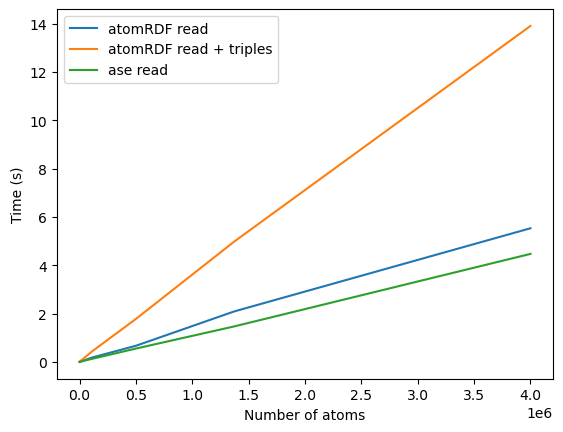

In [24]:
N = n**3*4
plt.plot(N, time_pyscal_data/1000, label='atomRDF read')
plt.plot(N, time_atomrdf_data/1000, label='atomRDF read + triples')
plt.plot(N, time_ase_data/1000, label='ase read')
#plt.plot(N, np.polyval(pf, N), label='cna read')
#plt.plot(n**3*4, time_atomrdf_data/1000 + time_ase_data/1000, label='double read')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of atoms')
plt.ylabel('Time (s)')
plt.legend()
plt.savefig('read_time.png', bbox_inches='tight')
#

In [ ]:
4,000,000